In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../Resources/MovieData_Clean.csv')
data.head()

,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,Poster,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions),Runtime (Min)
0,110681,Kings of the Evening,2008-01-01,0.0,98682.0,tt1006904,PG,99 min,Drama,Andrew P. Jones,...,https://m.media-amazon.com/images/M/MV5BMjA3OT...,6.0,234,01 Nov 2010,Indican Pictures,Tuesday,January,2008,0.098682,99.0
1,26163,The Decline And Fall Of America,2008-01-01,7500.0,1200.0,tt1786696,NaN,120 min,Documentary,B.A. Brooks,...,https://m.media-amazon.com/images/M/MV5BMTMzNj...,5.2,13,NaN,NaN,Tuesday,January,2008,0.001200,120.0
2,13971,Wild Child,2008-01-01,20000000.0,21972336.0,tt1024255,PG-13,124 min,"Comedy, Drama, Romance",Nick Moore,...,https://m.media-amazon.com/images/M/MV5BNzUzYT...,6.1,"46,716",17 Nov 2009,Universal Pictures,Tuesday,January,2008,21.972336,124.0
3,6933,One Missed Call,2008-01-04,27.0,26.0,tt0479968,PG-13,87 min,"Horror, Mystery",Eric Valette,...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,4.0,"30,026",22 Apr 2008,Warner Bros. Pictures,Friday,January,2008,0.000026,87.0
4,14423,First Sunday,2008-01-11,0.0,38804615.0,tt0486578,PG-13,96 min,"Comedy, Crime, Drama",David E. Talbert,...,https://m.media-amazon.com/images/M/MV5BMjE4MT...,4.5,"9,203",13 May 2008,NaN,Friday,January,2008,38.804615,96.0


In [3]:
data_df = data[['Title','Day of Release','Month of Release','Revenue (Millions)','IMDB Rating']]
data_df=data_df.dropna()
data_df.head()

,Title,Day of Release,Month of Release,Revenue (Millions),IMDB Rating
0,Kings of the Evening,Tuesday,January,0.098682,6.0
1,The Decline And Fall Of America,Tuesday,January,0.001200,5.2
2,Wild Child,Tuesday,January,21.972336,6.1
3,One Missed Call,Friday,January,0.000026,4.0
4,First Sunday,Friday,January,38.804615,4.5


In [4]:
day_group = data_df.groupby('Day of Release')
count_days=day_group['Day of Release'].count()
days_df=count_days.to_frame()

days = {'Sunday':1,
         'Monday':2,
         'Tuesday':3,
         'Wednesday': 4,
         'Thursday':5,
         'Friday':6,
         'Saturday':7}
days_df['sorted'] = None

for index, row in days_df.iterrows():
    days_df.loc[index,'sorted']=days[index]


# count_days.loc[count_days['Day of Release']=='Friday']
days_df=days_df.rename(columns={'Day of Release':'Movie Count'})

days_df=days_df.sort_values(by='sorted')
days_df=days_df.drop(columns='sorted')
days_df

,Movie Count
Day of Release,
Sunday,70
Monday,59
Tuesday,122
Wednesday,250
Thursday,297
Friday,2252
Saturday,90


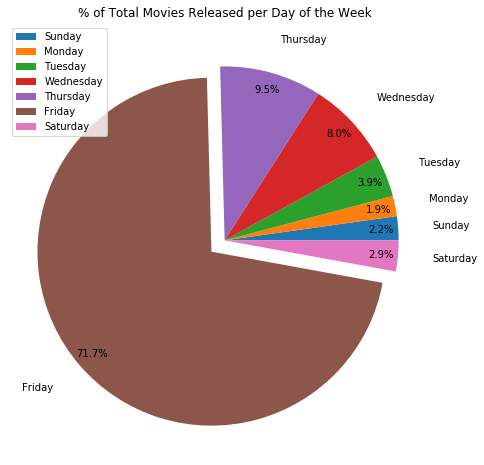

In [5]:
explode = [0, 0, 0, 0, 0, 0.1, 0]
days_df.plot.pie(y='Movie Count',autopct="%1.1f%%",figsize=(8,8),explode=explode,legend=True, pctdistance=.9,labeldistance=1.2,title='% of Total Movies Released per Day of the Week')
plt.ylabel('')
plt.show()

In [6]:
days_df['Total Revenue (Millions)']=day_group['Revenue (Millions)'].sum()
days_df['Average Revenue (Millions)']=day_group['Revenue (Millions)'].mean()
days_df

,Movie Count,Total Revenue (Millions),Average Revenue (Millions)
Day of Release,,,
Sunday,70,2725.233805,38.931912
Monday,59,2748.035910,46.576880
Tuesday,122,7826.091872,64.148294
Wednesday,250,31619.207959,126.476832
Thursday,297,26789.964179,90.201900
Friday,2252,207120.095423,91.971623
Saturday,90,3257.936393,36.199293


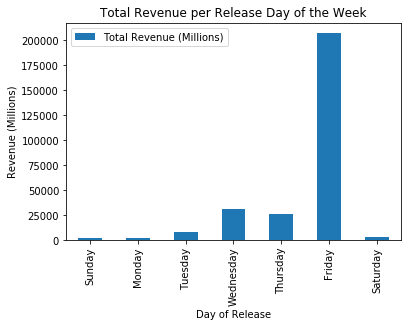

In [7]:
days_df.plot.bar(y='Total Revenue (Millions)',title='Total Revenue per Release Day of the Week')
plt.ylabel('Revenue (Millions)')
plt.show()

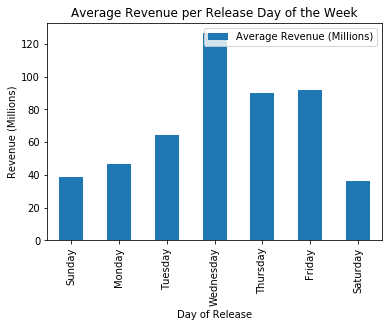

In [8]:
days_df.plot.bar(y='Average Revenue (Millions)',title='Average Revenue per Release Day of the Week')
plt.ylabel('Revenue (Millions)')
plt.show()

In [9]:
days_df['Average Rating']=round(day_group['IMDB Rating'].mean(),1)
days_df

,Movie Count,Total Revenue (Millions),Average Revenue (Millions),Average Rating
Day of Release,,,,
Sunday,70,2725.233805,38.931912,6.4
Monday,59,2748.035910,46.576880,6.5
Tuesday,122,7826.091872,64.148294,6.3
Wednesday,250,31619.207959,126.476832,6.7
Thursday,297,26789.964179,90.201900,6.5
Friday,2252,207120.095423,91.971623,6.4
Saturday,90,3257.936393,36.199293,6.6


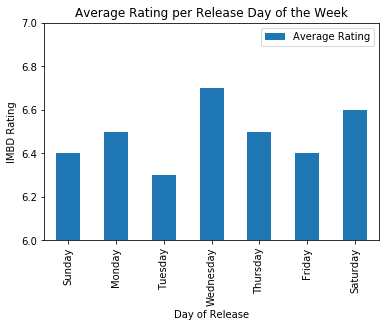

In [10]:
days_df.plot.bar(y='Average Rating', title = 'Average Rating per Release Day of the Week')
plt.ylabel('IMBD Rating')
plt.ylim(6,7)
plt.show()

In [11]:
month_group = data_df.groupby('Month of Release')
count_months=month_group['Month of Release'].count()
months_df=count_months.to_frame()

months = {'January':1,
         'February':2,
         'March':3,
         'April':4,
         'May':5,
         'June':6,
         'July':7,
         'August':8,
         'September':9,
         'October':10,
         'November':11,
         'December':12}

months_df['sorted'] = None

for index, row in months_df.iterrows():
    months_df.loc[index,'sorted']=months[index]


# count_days.loc[count_days['Day of Release']=='Friday']
months_df=months_df.rename(columns={'Month of Release':'Movie Count'})

months_df=months_df.sort_values(by='sorted')
months_df=months_df.drop(columns='sorted')
months_df

,Movie Count
Month of Release,
January,204
February,238
March,272
April,277
May,217
June,247
July,232
August,259
September,303


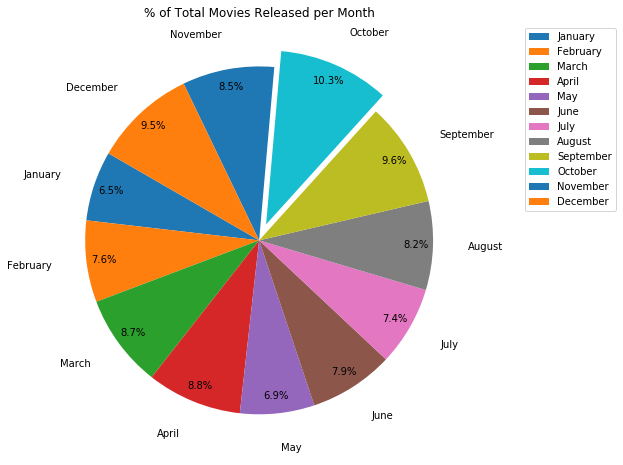

In [12]:
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0]
months_df.plot.pie(y='Movie Count',autopct="%1.1f%%",figsize=(8,8),explode=explode,legend=True, startangle=150, pctdistance=.9,labeldistance=1.2,title='% of Total Movies Released per Month')
plt.legend(bbox_to_anchor=(1.1,1))
plt.ylabel('') 
plt.show()

In [13]:
months_df['Total Revenue (Millions)'] = month_group['Revenue (Millions)'].sum()
months_df['Average Revenue (Millions)'] = month_group['Revenue (Millions)'].mean()
months_df


,Movie Count,Total Revenue (Millions),Average Revenue (Millions)
Month of Release,,,
January,204,10162.907673,49.818175
February,238,17206.129046,72.294660
March,272,21831.247029,80.261938
April,277,17488.053782,63.133768
May,217,31136.368611,143.485570
June,247,32712.521498,132.439358
July,232,32968.681732,142.106387
August,259,15584.099760,60.170269
September,303,13804.754571,45.560246


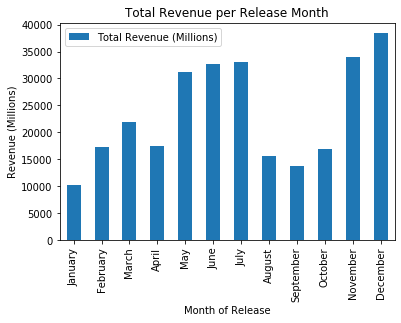

In [14]:
months_df.plot.bar(y='Total Revenue (Millions)',title='Total Revenue per Release Month')
plt.ylabel('Revenue (Millions)')
plt.show()

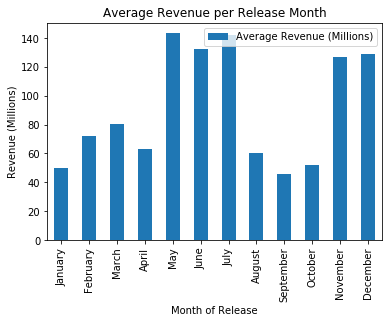

In [15]:
months_df.plot.bar(y='Average Revenue (Millions)',title='Average Revenue per Release Month')
plt.ylabel('Revenue (Millions)')
plt.show()

In [16]:
months_df['Average Rating']= round(month_group['IMDB Rating'].mean(),1)
months_df

,Movie Count,Total Revenue (Millions),Average Revenue (Millions),Average Rating
Month of Release,,,,
January,204,10162.907673,49.818175,6.1
February,238,17206.129046,72.294660,6.3
March,272,21831.247029,80.261938,6.4
April,277,17488.053782,63.133768,6.3
May,217,31136.368611,143.485570,6.4
June,247,32712.521498,132.439358,6.5
July,232,32968.681732,142.106387,6.4
August,259,15584.099760,60.170269,6.4
September,303,13804.754571,45.560246,6.4


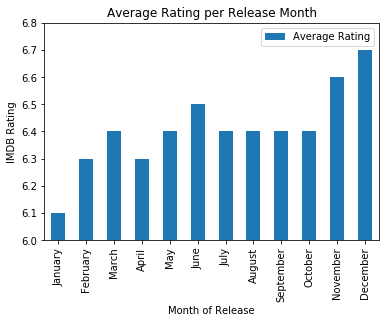

In [17]:
months_df.plot.bar(y='Average Rating',title = 'Average Rating per Release Month')
plt.ylabel('IMDB Rating')
plt.ylim(6,6.8)
plt.show()